In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('Classified Data.csv',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [39]:
X = df.iloc[:,:-1].values  # matrix of features
y = df.iloc[:,-1].values  # dependent vector

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

In [44]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 74  12]
 [ 12 102]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        86
           1       0.89      0.89      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [48]:
# choosing a K value
error_rate = []

for i in range(1,40):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

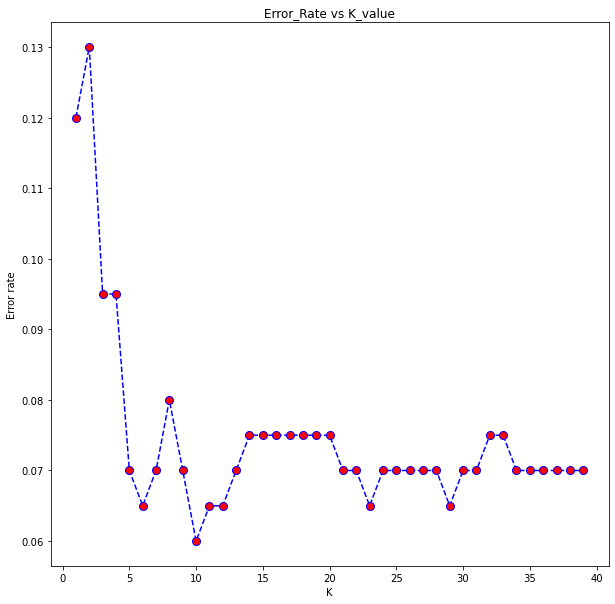

In [49]:
plt.figure(figsize = (10,10))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',markersize = 8)
plt.title('Error_Rate vs K_value')
plt.ylabel('Error rate')
plt.xlabel('K')
plt.show()

In [50]:
# K= 10 is an optimal value from the graph
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [51]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 80   6]
 [  6 108]]


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        86
           1       0.95      0.95      0.95       114

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

